In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
base_dir=r"C:\Users\Rabbani\dataset0"

In [21]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1482 images belonging to 3 classes.
Found 163 images belonging to 3 classes.


In [22]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 64)       

In [23]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [25]:
history = model.fit_generator(train_datagen,
                              epochs=20,
                              validation_data=test_datagen,
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
24/24 [==============================] - 30s 1s/step - loss: 1.1097 - accuracy: 0.3462 - val_loss: 1.0946 - val_accuracy: 0.3558
Epoch 2/20
24/24 [==============================] - 31s 1s/step - loss: 1.0492 - accuracy: 0.3644 - val_loss: 1.0746 - val_accuracy: 0.3620
Epoch 3/20
24/24 [==============================] - 34s 1s/step - loss: 0.9016 - accuracy: 0.5486 - val_loss: 0.9044 - val_accuracy: 0.5276
Epoch 4/20
24/24 [==============================] - 33s 1s/step - loss: 0.7379 - accuracy: 0.6019 - val_loss: 0.9564 - val_accuracy: 0.5215
Epoch 5/20
24/24 [==============================] - 34s 1s/step - loss: 0.6432 - accuracy: 0.6930 - val_loss: 0.8191 - val_accuracy: 0.5890
Epoch 6/20
24/24 [==============================] - 35s 1s/step - loss: 0.5700 - accuracy: 0.7915 - val_loss: 0.9085 - val_accuracy: 0.5644
Epoch 7/20
24/24 [==============================] - 33s 1s/step - loss: 0.6835 - acc

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [27]:
epochs=range(len(acc))

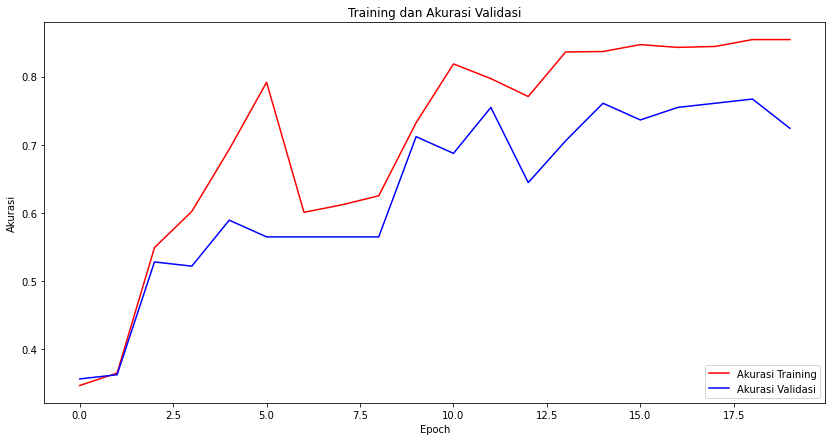

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Akurasi Training")
plt.plot(epochs, val_acc, 'b', label="Akurasi Validasi")
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Training dan Akurhttp://localhost:8888/notebooks/Untitled33.ipynb?kernel_name=python3#asi Validasi')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training dan loss validasi')

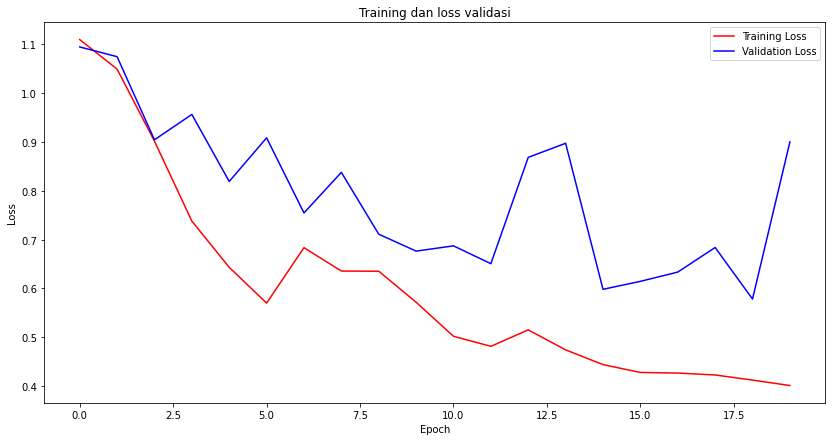

In [31]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training dan loss validasi')